## Q1. Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
dataset = pd.read_csv("C:/Users/Dhanashree/Downloads/50_Startups.csv")
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### EDA

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
dataset.shape

(50, 5)

In [6]:
dataset.isnull().sum ()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Renaming
data=dataset.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
# check for duplicate data
data[data.duplicated()]

,RDS,ADMS,MKTS,State,Profit


### Correlation Analysis

In [9]:
data.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


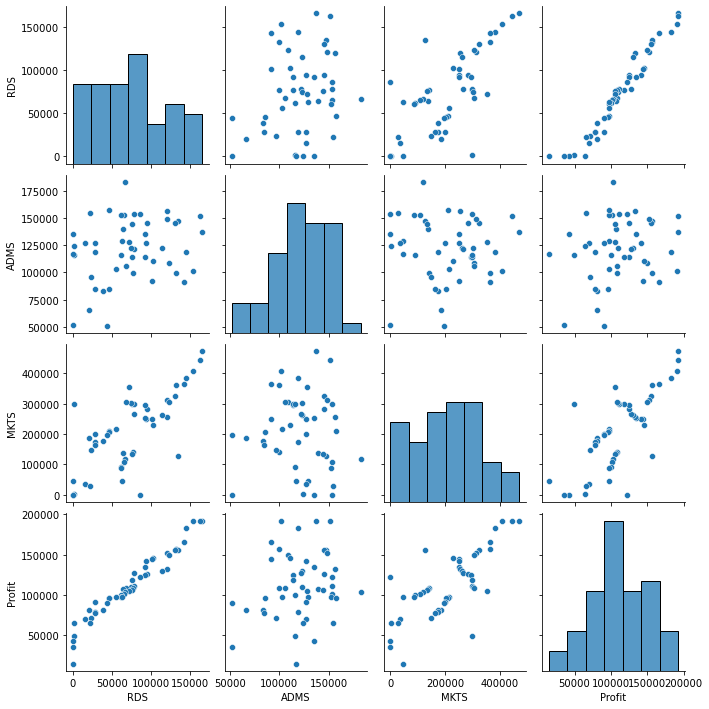

In [10]:
sns.pairplot(data)

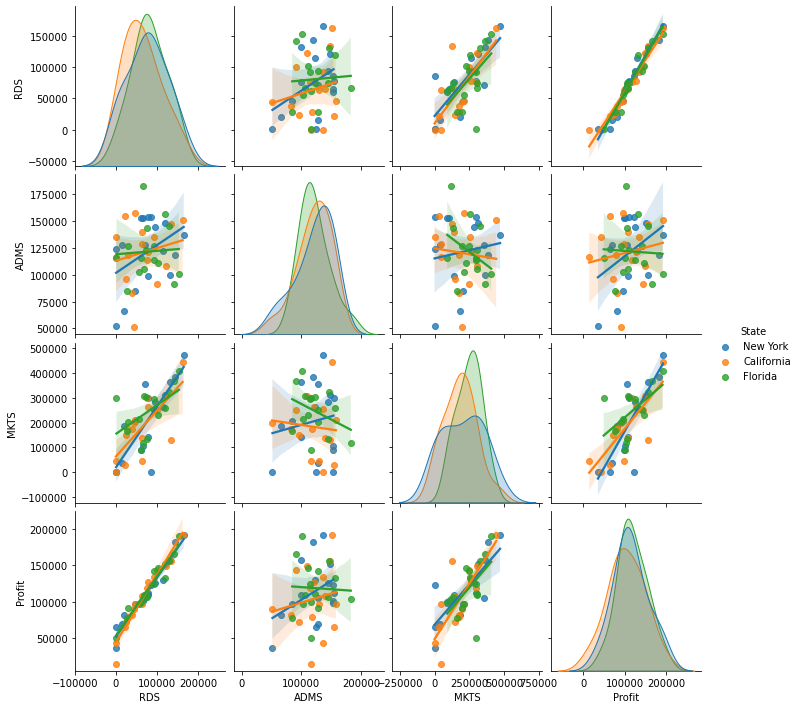

In [11]:
sns.pairplot(data,kind='reg',hue = 'State')

### Model Building

In [12]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()
model

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        22:24:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Testing

In [14]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [15]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [16]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  

(0.9507459940683246, 0.9475337762901719)

#### Model accuracy = 94.75%

In [17]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# And find their tvalues and pvalues

In [18]:
slr_a=smf.ols("Profit~ADMS",data=data).fit()
slr_a.tvalues , slr_a.pvalues 

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [19]:
# ADMS has in-significant pvalue

In [20]:
slr_m=smf.ols("Profit~MKTS",data=data).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [21]:
# MKTS has significant pvalue

In [22]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

In [23]:
 # varaibles have significant pvalues

### Model Validation 

#### Using COLLINEARITY CHECK and RESIDUAL ANALYSIS

In [24]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

In [25]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

In [26]:
rsq_a=smf.ols("ADMS~RDS+MKTS",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

In [27]:
rsq_m=smf.ols("MKTS~RDS+ADMS",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

In [28]:
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [29]:
# None variable has VIF>20, No Collinearity hence, consider all varaibles in Regression equation.

In [30]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

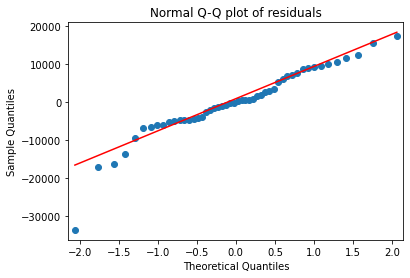

In [31]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [33]:
list(np.where(model.resid>20))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

### Residual Plot for Homoscedasticity

In [34]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

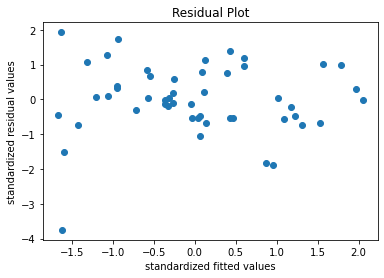

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show

eval_env: 1


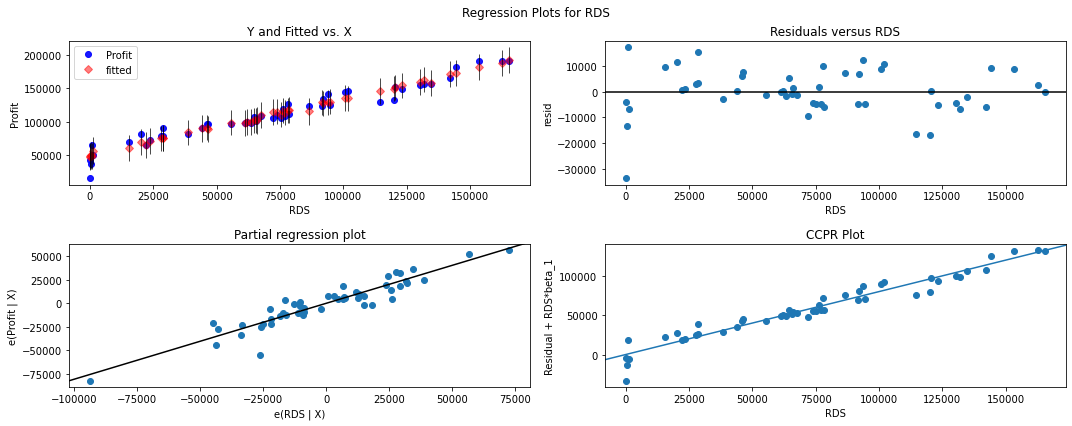

In [36]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model, "RDS",fig=fig)
plt.show()

eval_env: 1


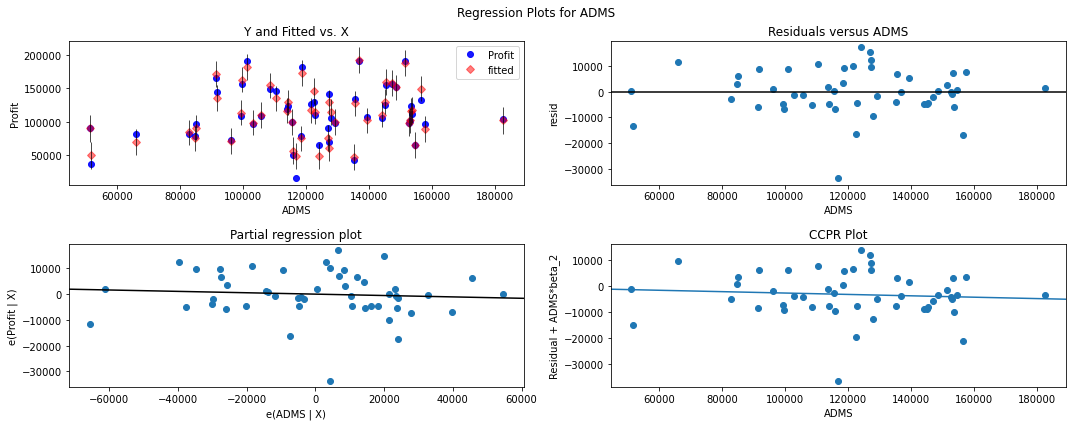

In [37]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model, "ADMS",fig=fig)
plt.show()

eval_env: 1


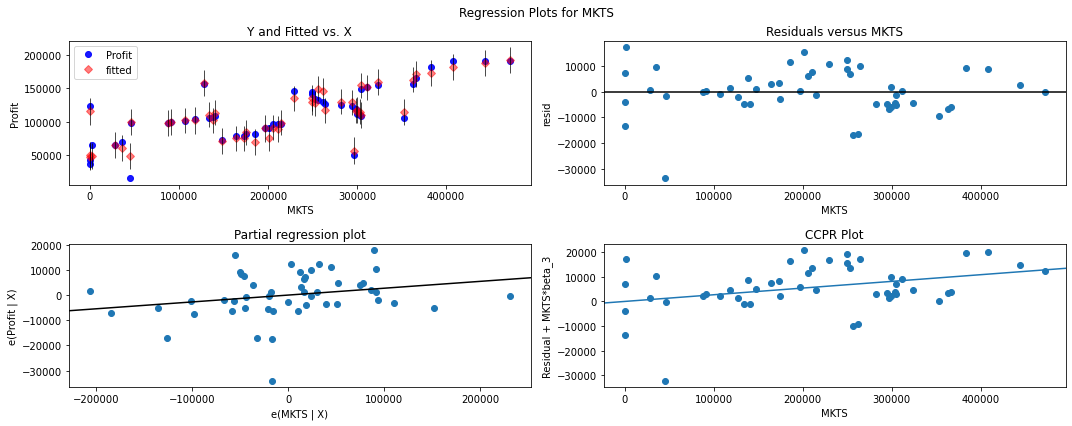

In [38]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model, "MKTS",fig=fig)
plt.show()

In [39]:
model_influnece=model.get_influence()
(c,_)=model_influnece.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

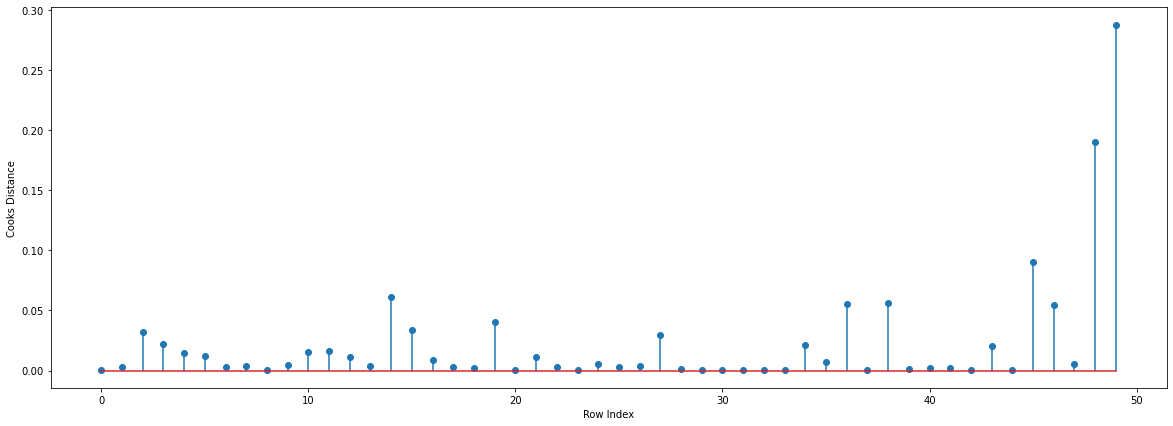

In [40]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
# index and values of influencer where c is more than 0.5

np.argmax(c),np.max(c)

(49, 0.2880822927543267)

In [42]:
data[data.index.isin([48,49])]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


### Imporoving the Model

In [43]:
# droping the two columns

data1_new=data.drop(data.index[[48,49]],axis=0).reset_index()
data1_new.head()

,index,RDS,ADMS,MKTS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
data1=data1_new.drop(['index'],axis=1)
data1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Build Final Model

In [45]:
final_slr_a=smf.ols('Profit~RDS+ADMS+MKTS',data=data1).fit()
final_slr_a

In [46]:
final_slr_a.rsquared, final_slr_a.aic

(0.9626766170294073, 994.6690439260116)

### Cook's Distance

In [47]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data1=data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data1
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073


In [48]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           2.03e-31
Time:                        22:24:19   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
ADMS          -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKTS           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
final_model.rsquared, final_model.rsquared_adj

(0.9626766170294073, 0.960131840917776)

In [50]:
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Model Prediction

In [51]:
data2=pd.DataFrame({'RDS':75000,"ADMS":90000,"MKTS":150000},index=[0])
data2

,RDS,ADMS,MKTS
0,75000,90000,150000


In [52]:
# prediction of final model with new DataFreame

final_model.predict(data2)

0    115143.452827
dtype: float64

In [53]:
# Prediction of final model with our original data

Prediction=final_model.predict(data)
Prediction

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
48     56248.562734
49     52450.878563


In [54]:
data["Predictions"]=Prediction
data.head()

,RDS,ADMS,MKTS,State,Profit,Predictions
0,165349.20,136897.80,471784.10,New York,192261.83,188939.277484
1,162597.70,151377.59,443898.53,California,191792.06,185378.579127
2,153441.51,101145.55,407934.54,Florida,191050.39,180724.354190
3,144372.41,118671.85,383199.62,New York,182901.99,172036.176973
4,142107.34,91391.77,366168.42,Florida,166187.94,171688.341312
